<h1>Group Project CSC221 Part2<h1>

## Author: <font color='red'> Ankur Gaur </font>

In [1]:
# Web Scraping  
# Using Python, Urllib, Beautiful Soup and Pandas
# URL: https://www.cricketworldcup.com/tournament-stats/players/most-runs

In [2]:
# Import ssl
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Import the library to open URLs
import urllib.request

# Import the BeautifulSoup library to parse HTML and XML documents
from bs4 import BeautifulSoup

# URL/web page that we are going to be scraping
url = "https://www.cricketworldcup.com/tournament-stats/players/most-runs"

# Open the url using urllib.request and put the HTML into the page variable
page = urllib.request.urlopen(url)

# Parse the HTML from our URL into the BeautifulSoup parse tree format
soup = BeautifulSoup(page, "lxml")

In [3]:
# Study the underlying HTML so we can scrape data
print(soup.prettify())

<html lang="en">
 <head>
  <style>
   :root {
        /* Primary Colours */
        --p-001: #320073;
        --p-002: #FF00A5;
        --p-003: #0096D2;
        --p-004: #FFD200;
        --p-005: #D70A0A;
        --p-006: #FFFFFF;
        --p-007: #271B5B;
        /* Neutral Colours */
        --n-100: #0D1635;
        --n-90: #0D1635;
        --n-80: #3D455D;
        --n-60: #6E7386;
        --n-40: #9EA2AE;
        --n-20: #CFD0D7;
        --n-10: #E7E8EB;
        --n-5: #F3F3F5;
        --n-black: #000000;
        --n-white: #FFFFFF;
        /* Primary Tints */
        --p-001-t-800: #14002E;
        --p-001-t-700: #1E0045;
        --p-001-t-600: #28005C;
        --p-001-t-500: #320073;
        --p-001-t-400: #5B338F;
        --p-001-t-300: #6F4C9D;
        --p-001-t-200: #AD99C7;
        --p-001-t-100: #D6CCE3;
        /* P2 Tints */
        --p-002-t-800: #660042;
        --p-002-t-700: #990063;
        --p-002-t-600: #CC0084;
        --p-002-t-500: #FF00A5;
        --p-002-t-400

In [4]:
# Print the title with & without HTML tags
print(soup.title.string)

Tournament Stats | Men's Cricket World Cup 2023


In [5]:
# Data that we are trying to scrape is in
# table -->  <table class="table">
# Therefore, Use find_all() to find all the <table ...> tags 
all_tables=soup.find_all("table")


In [6]:
# Print the type & length of all_tables
print(type(all_tables))
print(len(all_tables))


<class 'bs4.element.ResultSet'>
1


In [7]:
# Iterate thru all_tables and print each table entry
for table in all_tables:
    print(f"TABLE: {table}\n")

TABLE: <table class="table">
<thead class="table-head u-hide-phablet">
<th class="table-head__cell stats-table__position u-text-left">Pos</th>
<th class="table-head__cell u-text-left">Player</th>
<th class="table-head__cell u-text-left">Team</th>
<th class="table-head__cell stats-table__main-stat">Runs</th>
<th class="table-head__cell stats-table__stat u-hide-phablet">Innings</th>
<th class="table-head__cell stats-table__stat u-show-phablet">I</th>
<th class="table-head__cell stats-table__stat u-hide-phablet">Bat Avg</th>
<th class="table-head__cell stats-table__stat u-show-phablet">BA</th>
<th class="table-head__cell stats-table__stat u-hide-phablet">Runs</th>
<th class="table-head__cell stats-table__stat u-show-phablet">R</th>
</thead>
<tbody>
<tr class="table-body table-body--hero js-row" data-team-id="14">
<td class="table-body__cell stats-table__position u-text-left js-pos hero">1</td>
<td class="table-body__cell stats-table__bio u-text-left hero" colspan="1">
<span class="stats-t

<p>Since there is only one table we can start scraping data by 
ignoring the headers and find the table rows ('tr' tags). The table 
has duplicate columns so we are only going to record data once.</p>

In [8]:
# Create a list for each of column of data that we are going to record
A = []
B = []
C = []
D = []
E = []
F = []
# Ignore the headers (<th></th>) and find the rows (<tr></tr>)
# start looping through the rows ... to get the data for every club in the table
for row in table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==10:
        A.append(cells[3].get_text().strip())
        B.append(cells[4].get_text().strip())
        C.append(cells[5].get_text().strip())
        D.append(cells[7].get_text().strip())
        E.append(cells[8].get_text().strip())
        F.append(cells[9].get_text().strip())

In [9]:
# Import Pandas library 
import pandas as pd

# Create a DataFrame using column 'A' to start, then ...
# add each of the lists as a column in the DataFrame with the required column name
df=pd.DataFrame(A,columns=['Pos'])
df['Player']=B
df['Team']=C
df['Innings']=D
df['BatAvg']=E
df['Runs']=F

# Display the DataFrame
df

,Pos,Player,Team,Innings,BatAvg,Runs
0,1,Virat Kohli,IND,11,95.62,765
1,2,Rohit Sharma,IND,11,54.27,597
2,3,Quinton de Kock,SA,10,59.40,594
3,4,Rachin Ravindra,NZ,10,64.22,578
4,5,Daryl Mitchell,NZ,9,69.00,552
5,6,David Warner,AUS,11,48.63,535
6,7,Shreyas Iyer,IND,11,66.25,530
7,8,KL Rahul,IND,10,75.33,452
8,9,Rassie van der Dussen,SA,10,49.77,448
9,10,Mitch Marsh,AUS,10,49.00,441


In [10]:
# Save the DataFrame (df) to a CSV file named 'Most-Runs.csv' 
df.to_csv('Most-Runs.csv')

# Print file created message
print('File Most-Runs.csv created')

File Most-Runs.csv created


In [11]:
import matplotlib.pyplot as plt

runs_df = pd.read_csv("Most-Runs.csv")

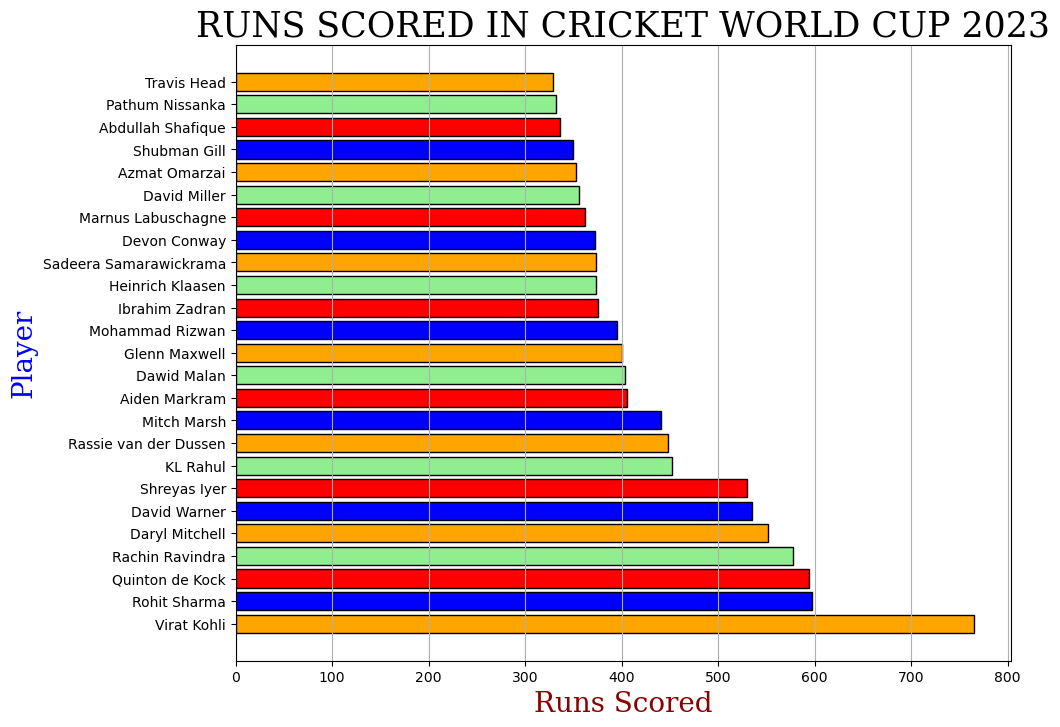

In [12]:
# Take the data values from 'Most-Runs.csv' and create a horizontal bar chart

bar_colors = ['orange', 'blue', 'red', 'lightgreen']
font1 = {'family':'serif', 'color':'black', 'size':25}
font2 = {'family':'serif', 'color':'darkred', 'size':20}
font3 = {'family':'serif', 'color':'blue', 'size':20}

plt.figure(figsize=(10,8))

plt.title("RUNS SCORED IN CRICKET WORLD CUP 2023", fontdict=font1)

plt.xlabel('Runs Scored', fontdict=font2)

plt.ylabel('Player', fontdict=font3)

plt.barh(runs_df['Player'], runs_df['Runs'], color=bar_colors, edgecolor='black')

plt.grid(axis='x')

plt.show()

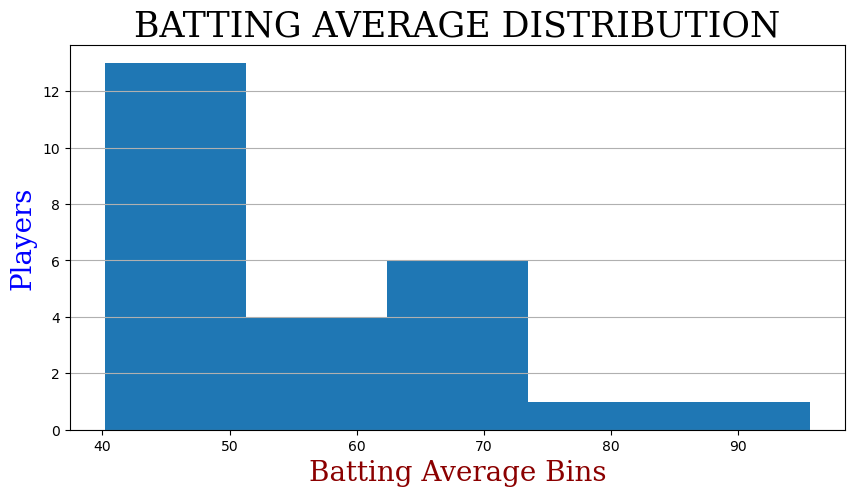

In [13]:
# Using the batting average column data create a histogram
plt.figure(figsize=(10,5))

plt.hist(runs_df['BatAvg'], bins=5, histtype='stepfilled')

# display the title
plt.title("BATTING AVERAGE DISTRIBUTION", fontdict=font1)

# display the labels
plt.xlabel("Batting Average Bins", fontdict=font2)
plt.ylabel("Players", fontdict=font3)

plt.grid(axis='y')

# Display the histogram
plt.show()